In [1]:
import pandas as pd
# %matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['figure.dpi'] = 100

In [40]:
dict_dia_semana = {}
semana = 'raw_semana_2020_11_02'
rango_fechas = [x for x in range(2, 9)]
dict_dia_semana [semana] = rango_fechas

semana = 'raw_semana_2020_11_09'
rango_fechas = [x for x in range(9, 16)]
dict_dia_semana [semana] = rango_fechas

semana = 'raw_semana_2020_11_16'
rango_fechas = [x for x in range(16, 21)]
dict_dia_semana [semana] = rango_fechas

conteo_datos_ele = []
conteo_datos_dsl = []

for semana in dict_dia_semana:
    for i in dict_dia_semana[semana]:
        fecha = f'2020_11_{i:02d}'
        print(f'Leyendo {fecha}')

        df_ele = pd.read_parquet(f'{semana}/raw_data_Ttec_{fecha}.parquet')
        conteo_datos_ele.append([len(df_ele.index), len(df_ele["patente"].unique())])
        df_dsl = pd.read_parquet(f'{semana}/raw_data_Ttec_dsl_{fecha}.parquet')
        conteo_datos_dsl.append([len(df_dsl.index), len(df_dsl["patente"].unique())])


Leyendo 2020_11_02
PGPT-49    146
PFYS-52    142
PFVG-29    142
PFVC-45    141
PGPT-59    140
          ... 
PFYS-99      1
PFVG-58      1
PGPT-26      1
PFYR-67      1
PFVJ-19      1
Name: patente, Length: 212, dtype: int64


In [7]:
df_ele = pd.DataFrame(conteo_datos_ele, columns=['Registros', 'Patentes'])

In [9]:
df_dsl = pd.DataFrame(conteo_datos_dsl, columns=['Registros', 'Patentes'])

In [11]:
df_ele['Tipo_Bus'] = 'Eléctrico'
df_dsl['Tipo_Bus'] = 'Diesel'

In [12]:
df = pd.concat([df_ele, df_dsl])

In [14]:
df['Razon'] = df['Registros'] / df['Patentes']

In [16]:
df['index'] = df['index'] + 2

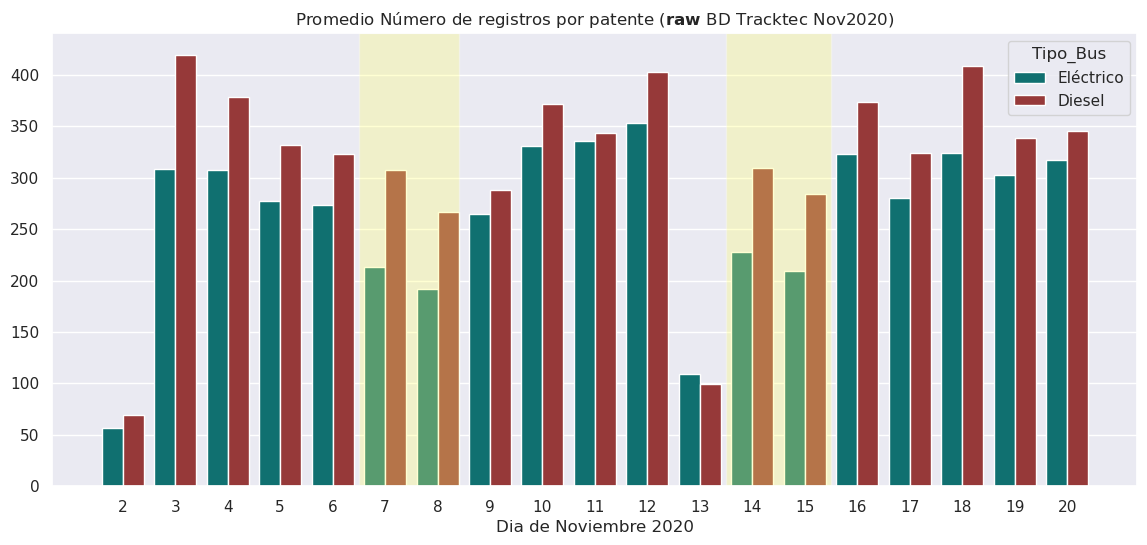

In [34]:
titulo_con_negrita = "Promedio Número de registros por patente (" + r"$\bf{raw}$" + " BD Tracktec Nov2020)"

palette = {'Eléctrico':'teal', 'Diesel':'brown'}
f, axes = plt.subplots(1, 1, figsize=(14, 6), sharex=True)
sns.barplot(data=df, x=df['index'], y=df['Razon'], hue='Tipo_Bus', palette=palette)
axes.set(xlabel='Dia de Noviembre 2020', ylabel='')
plt.title(titulo_con_negrita)
plt.axvspan(4.5, 6.4, facecolor='#FFFF6F', alpha=0.3)
plt.axvspan(11.5, 13.5, facecolor='#FFFF6F', alpha=0.3)

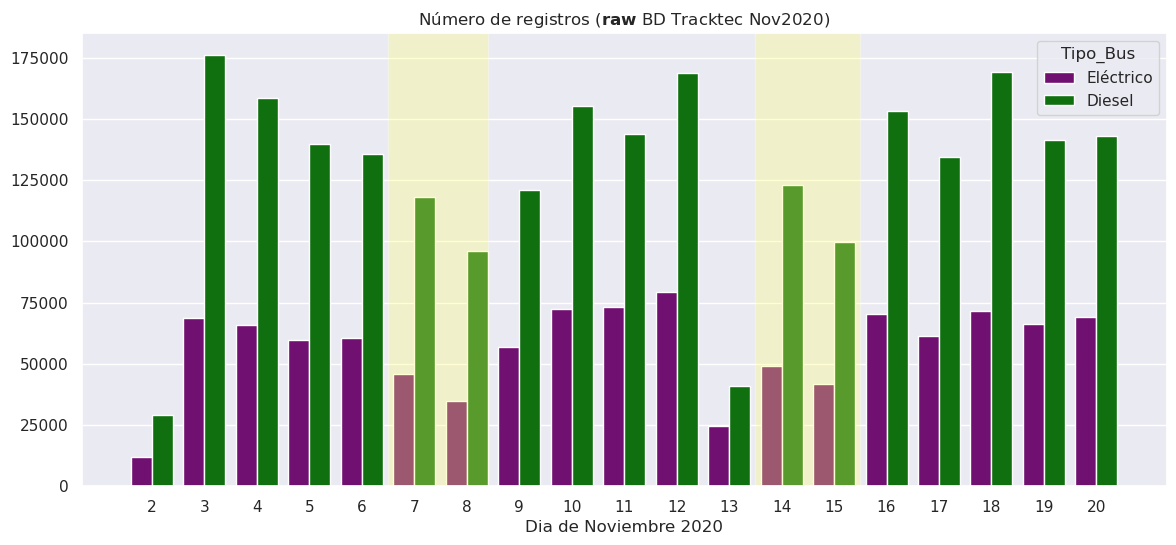

In [47]:
titulo_con_negrita = "Número de registros (" + r"$\bf{raw}$" + " BD Tracktec Nov2020)"

palette = {'Eléctrico':'purple', 'Diesel':'green'}
f, axes = plt.subplots(1, 1, figsize=(14, 6), sharex=True)
sns.barplot(data=df, x=df['index'], y=df['Registros'], hue='Tipo_Bus', palette=palette)
axes.set(xlabel='Dia de Noviembre 2020', ylabel='')
plt.title(titulo_con_negrita)
plt.axvspan(4.5, 6.4, facecolor='#FFFF6F', alpha=0.3)
plt.axvspan(11.5, 13.5, facecolor='#FFFF6F', alpha=0.3)